<a href="https://colab.research.google.com/github/WilliamAshbee/AdvancedNetworkingGroupProject/blob/main/NetworkingProjectForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os


In [ ]:
from IPython.display import clear_output
clear_output()



In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import seaborn as sns

In [ ]:
sns.set(color_codes = True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

#what does this do

In [ ]:
from numpy.random import seed

In [ ]:
pip install tensorflow

In [ ]:
#from tensorflow import set_random_seed https://stackoverflow.com/questions/58638701/importerror-cannot-import-name-set-random-seed-from-tensorflow-c-users-po

In [ ]:
import tensorflow as tf

In [ ]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector

In [ ]:
from keras.models import Model

In [ ]:
from keras import regularizers

In [ ]:
seed(10)
tf.random.set_seed(10)#modified for v2, haven't verified it works deterministically 

In [ ]:
testfile = "test.txt"
trainfile = "training.txt"
#datapath = '/content/drive/MyDrive/GeorgiaStateUniversity/trello/networkingproject/Bearing_Sensor_Data_pt1'
#datapath = '/content/drive/MyDrive/GeorgiaStateUniversity/trello/networkingproject/BSD_1_2'
PreprocessedDatasets = '/content/drive/MyDrive/GeorgiaStateUniversity/trello/networkingproject/02-PreprocessedDatasets'
movingaway = '/content/drive/MyDrive/GeorgiaStateUniversity/trello/networkingproject/02-PreprocessedDatasets/moving-away.csv'
movingcloser = '/content/drive/MyDrive/GeorgiaStateUniversity/trello/networkingproject/02-PreprocessedDatasets/moving-closerfarcloser.csv'
stablelong = '/content/drive/MyDrive/GeorgiaStateUniversity/trello/networkingproject/02-PreprocessedDatasets/stable-longdistance.csv'
stableshort = '/content/drive/MyDrive/GeorgiaStateUniversity/trello/networkingproject/02-PreprocessedDatasets/stable-middistance.csv'
stableshort2 = '/content/drive/MyDrive/GeorgiaStateUniversity/trello/networkingproject/02-PreprocessedDatasets/stable-shortistance2.csv'

In [ ]:
#value = movingaway
merged_data = pd.DataFrame()
#for filename in os.listdir(data_dir):
try:
  #value = os.path.join(data_dir, filename)
  #print(value)
  dataset1 = pd.read_csv(movingaway, sep='\t')
  dataset2 = pd.read_csv(movingcloser, sep='\t')
  dataset3 = pd.read_csv(stablelong, sep='\t')
  dataset4 = pd.read_csv(stableshort, sep='\t')
  dataset5 = pd.read_csv(stableshort2, sep='\t')
  #print(dataset)
  #dataset_mean_abs = np.array(dataset.abs().mean())
  #dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
  #dataset_mean_abs.index = [filename]
  #merged_data = merged_data.append(dataset_mean_abs)
except:
  #continue
  print('error')
#merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

In [ ]:
train1 = dataset1[dataset1['date_index']<=2000] 
test1 = dataset1[dataset1['date_index']>2000] 

train2 = dataset2[dataset2['date_index']<=2000] 
test2 = dataset2[dataset2['date_index']>2000] 

train3 = dataset3[dataset3['date_index']<=2000] 
test3 = dataset3[dataset3['date_index']>2000] 

train4 = dataset3[dataset3['date_index']<=2000] 
test4 = dataset3[dataset3['date_index']>2000] 

train5 = dataset3[dataset3['date_index']<=2000] 
test5 = dataset3[dataset3['date_index']>2000] 

In [ ]:
"""
fig, ax = plt.subplots(figsize=(14,6),dpi=80)
ax.plot(train1['rsrp'],label = '1', color='blue', animated=True, linewidth=1)
ax.plot(train1['rsrq'],label = '1', color='blue', animated=True, linewidth=1)
ax.plot(train1['wbcqi'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['macStats_phr'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['dlCqiReport_sfnSn'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['macStats_totalBytesSdusDl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['macStats_totalTbsUl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['macStats_mcs1Ul'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['macStats_totalPduDl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['macStats_totalBytesSdusUl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['macStats_tbsDl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['macStats_totalPrbUl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['macStats_macSdusDl_sduLength'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['macStats_macSdusDl_lcid'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['macStats_prbUl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train1['macStats_totalPduUl'],label = '1', color='blue', animated=True, linewidth=1)
ax.plot(train1['macStats_mcs1Dl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train['macStats_mcs2Dl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train['macStats_prbDl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train['macStats_totalPrbDl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train['macStats_prbRetxDl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train['macStats_totalTbsDl'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train['ulCqiReport_sfnSn'],label = '1', color='blue', animated=True, linewidth=1)
ax.plot(train1['pdcpStats_pktRx'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train['pdcpStats_pktRxW'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train['pdcpStats_pktRxAiatW'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train['pdcpStats_pktRxOo'],label = '1', color='blue', animated=True, linewidth=1)
#ax.plot(train['pdcpStats_pktRxBytesW'],label = '1', color='blue', animated=True, linewidth=1)
ax.plot(train1['pdcpStats_pktRxSn'],label = '1', color='blue', animated=True, linewidth=1)

ax.plot(train1['pdcpStats_pktTxBytesW'],label = 'Bearing 2', color='red', animated=True, linewidth=1)
ax.plot(train1['pdcpStats_pktTxSn'],label = 'Bearing 3', color='green', animated=True, linewidth=1)
ax.plot(train1['pdcpStats_pktTxBytes'],label = 'Bearing 4', color='black', animated=True, linewidth=1)
ax.plot(train1['pdcpStats_pktRxAiat'],label = 'Bearing 3', color='green', animated=True, linewidth=1)
ax.plot(train1['pdcpStats_pktRxBytes'],label = 'Bearing 3', color='green', animated=True, linewidth=1)
ax.plot(train1['pdcpStats_pktTx'],label = 'Bearing 3', color='green', animated=True, linewidth=1)
ax.plot(train1['pdcpStats_pktTxW'],label = 'Bearing 3', color='green', animated=True, linewidth=1)
ax.plot(train1['pdcpStats_pktTxAiatW'],label = 'Bearing 3', color='green', animated=True, linewidth=1)
ax.plot(train1['pdcpStats_sfn'],label = 'Bearing 3', color='green', animated=True, linewidth=1)
ax.plot(train1['pdcpStats_pktTxAiat'],label = 'Bearing 3', color='green', animated=True, linewidth=1)
ax.plot(train1['rnti'],label = 'Bearing 3', color='green', animated=True, linewidth=1)
ax.plot(train1['quality'],label = 'Bearing 3', color='green', animated=True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('moving away training data',fontsize=16)
plt.show()
"""


"\nfig, ax = plt.subplots(figsize=(14,6),dpi=80)\nax.plot(train1['rsrp'],label = '1', color='blue', animated=True, linewidth=1)\nax.plot(train1['rsrq'],label = '1', color='blue', animated=True, linewidth=1)\nax.plot(train1['wbcqi'],label = '1', color='blue', animated=True, linewidth=1)\n#ax.plot(train1['macStats_phr'],label = '1', color='blue', animated=True, linewidth=1)\n#ax.plot(train1['dlCqiReport_sfnSn'],label = '1', color='blue', animated=True, linewidth=1)\n#ax.plot(train1['macStats_totalBytesSdusDl'],label = '1', color='blue', animated=True, linewidth=1)\n#ax.plot(train1['macStats_totalTbsUl'],label = '1', color='blue', animated=True, linewidth=1)\n#ax.plot(train1['macStats_mcs1Ul'],label = '1', color='blue', animated=True, linewidth=1)\n#ax.plot(train1['macStats_totalPduDl'],label = '1', color='blue', animated=True, linewidth=1)\n#ax.plot(train1['macStats_totalBytesSdusUl'],label = '1', color='blue', animated=True, linewidth=1)\n#ax.plot(train1['macStats_tbsDl'],label = '1', c

1
2
14
15
21
25
27
36
41
1
2
14
15
19
21
25
27
36
41
1
2
14
15
21
25
27
36
41
1
2
14
15
25
27
36
41
1
2
14
15
19
21
25
27
36
41


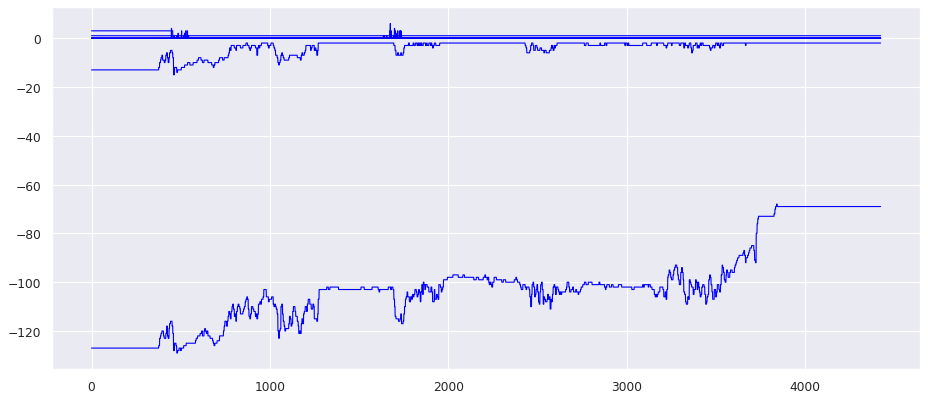

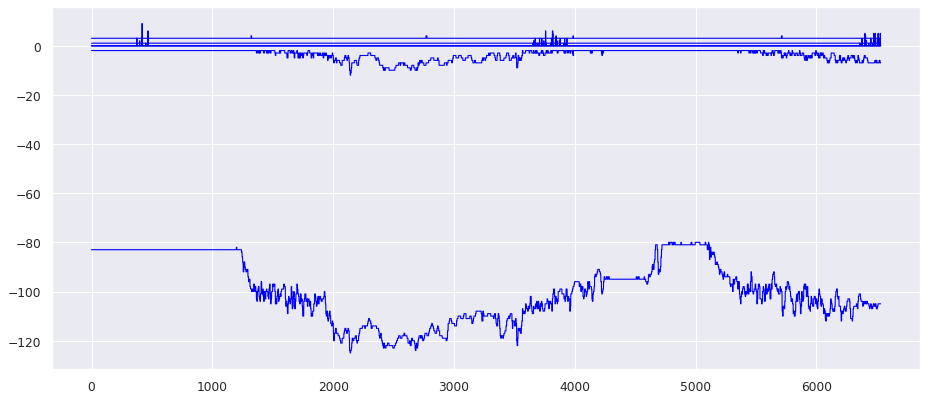

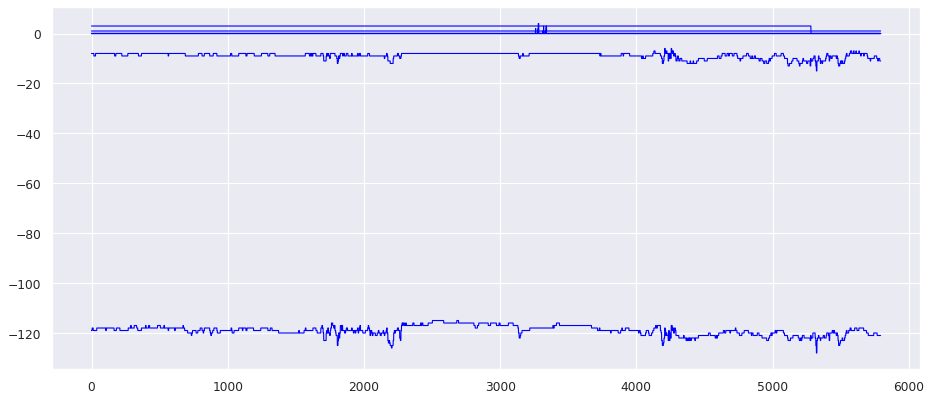

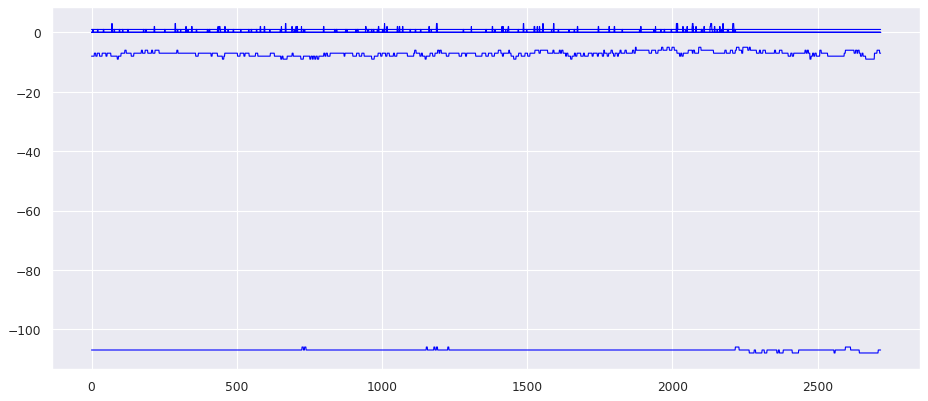

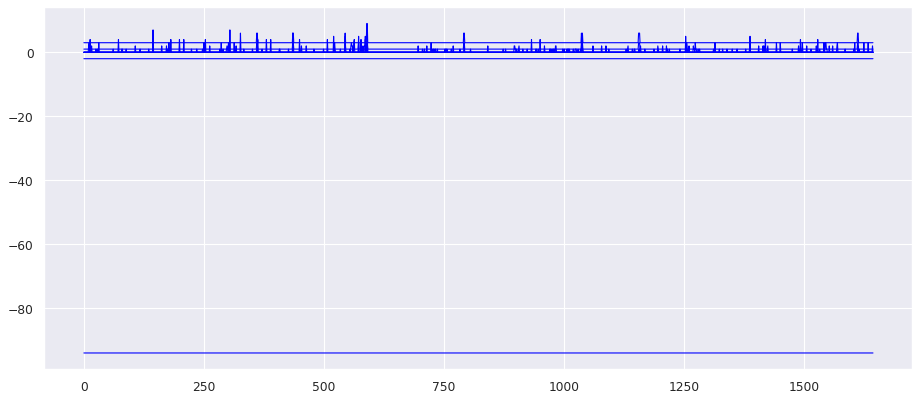

In [ ]:
fig, ax = plt.subplots(figsize=(14,6),dpi=80)

for i in range(42):
  if np.max(dataset1.to_numpy()[:,i]) < 10:
    print(i)
    ax.plot(dataset1.to_numpy()[:,i],label = str(i), color='blue', animated=True, linewidth=1)

fig, ax = plt.subplots(figsize=(14,6),dpi=80)

for i in range(42):
  if np.max(dataset2.to_numpy()[:,i]) < 10:
    print(i)
    ax.plot(dataset2.to_numpy()[:,i],label = str(i), color='blue', animated=True, linewidth=1)

fig, ax = plt.subplots(figsize=(14,6),dpi=80)

for i in range(42):
  if np.max(dataset3.to_numpy()[:,i]) < 10:
    print(i)
    ax.plot(dataset3.to_numpy()[:,i],label = str(i), color='blue', animated=True, linewidth=1)

fig, ax = plt.subplots(figsize=(14,6),dpi=80)

for i in range(42):
  if np.max(dataset4.to_numpy()[:,i]) < 10:
    print(i)
    ax.plot(dataset4.to_numpy()[:,i],label = str(i), color='blue', animated=True, linewidth=1)

fig, ax = plt.subplots(figsize=(14,6),dpi=80)

for i in range(42):
  if np.max(dataset5.to_numpy()[:,i]) < 10:
    print(i)
    ax.plot(dataset5.to_numpy()[:,i],label = str(i), color='blue', animated=True, linewidth=1)


In [ ]:
#indexes = [1, 2, 14, 15, 21, 25, 27, 36, 41]
indexes = [1, 2]


0
1
0
1
0
1
0
1
0
1


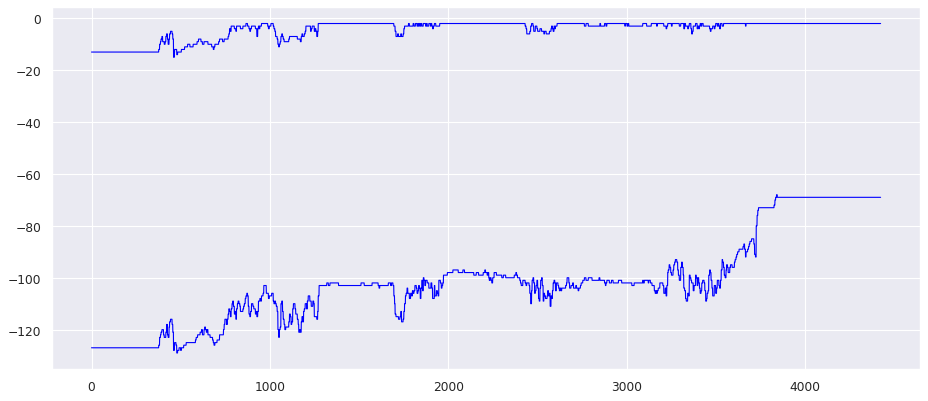

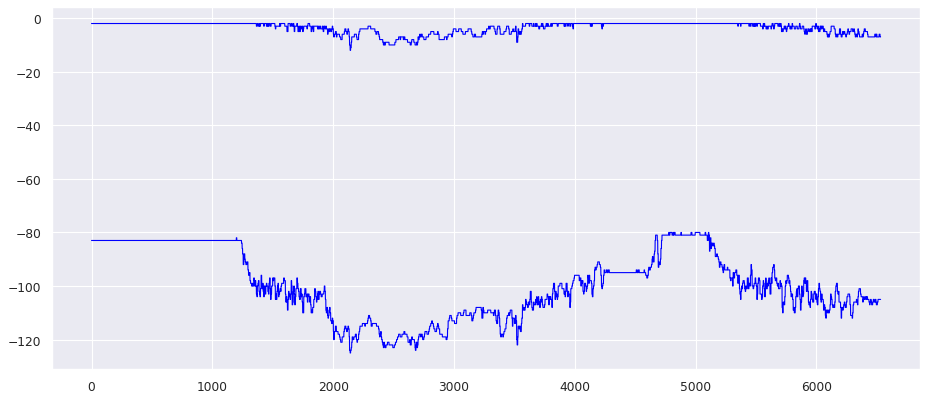

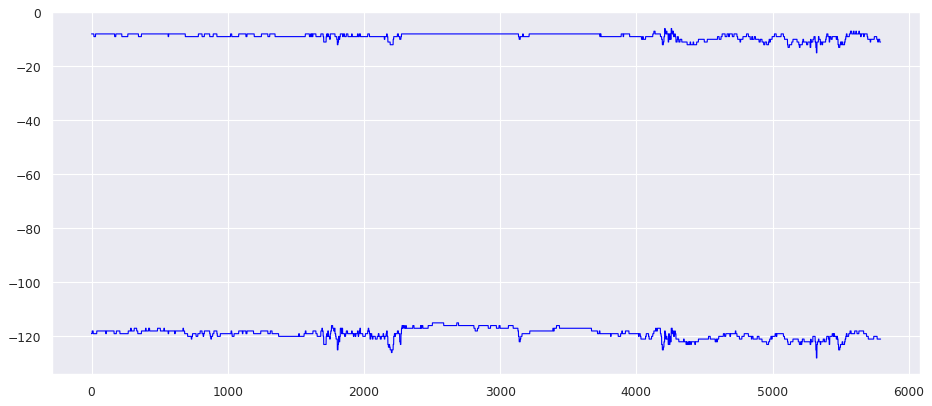

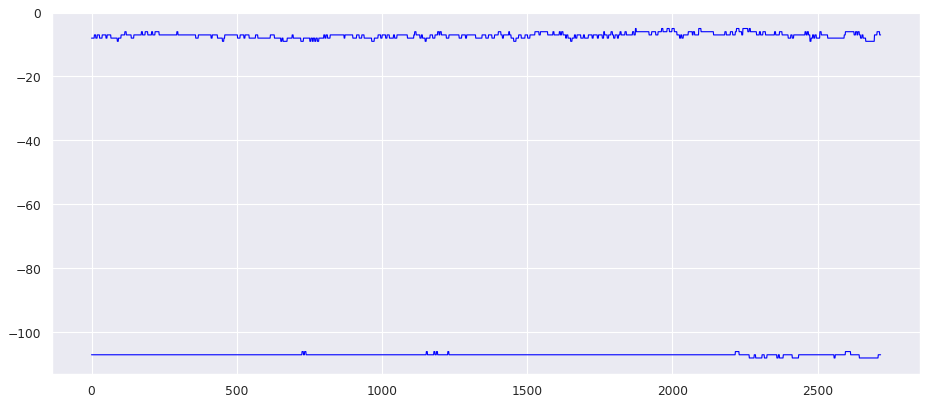

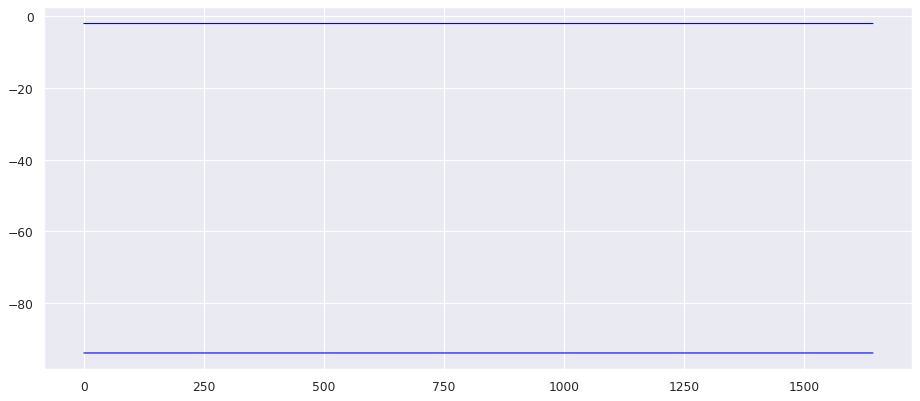

In [ ]:
fig, ax = plt.subplots(figsize=(14,6),dpi=80)

for i in range(len(indexes)):
  if np.max(dataset1.to_numpy()[:,indexes[i]]) < 10:
    print(i)
    ax.plot(dataset1.to_numpy()[:,indexes[i]],label = str(i), color='blue', animated=True, linewidth=1)

fig, ax = plt.subplots(figsize=(14,6),dpi=80)

for i in range(len(indexes)):
  if np.max(dataset2.to_numpy()[:,indexes[i]]) < 10:
    print(i)
    ax.plot(dataset2.to_numpy()[:,indexes[i]],label = str(i), color='blue', animated=True, linewidth=1)

fig, ax = plt.subplots(figsize=(14,6),dpi=80)

for i in range(len(indexes)):
  if np.max(dataset3.to_numpy()[:,indexes[i]]) < 10:
    print(i)
    ax.plot(dataset3.to_numpy()[:,indexes[i]],label = str(i), color='blue', animated=True, linewidth=1)

fig, ax = plt.subplots(figsize=(14,6),dpi=80)

for i in range(len(indexes)):
  if np.max(dataset4.to_numpy()[:,indexes[i]]) < 10:
    print(i)
    ax.plot(dataset4.to_numpy()[:,indexes[i]],label = str(i), color='blue', animated=True, linewidth=1)

fig, ax = plt.subplots(figsize=(14,6),dpi=80)

for i in range(len(indexes)):
  if np.max(dataset5.to_numpy()[:,indexes[i]]) < 10:
    print(i)
    ax.plot(dataset5.to_numpy()[:,indexes[i]],label = str(i), color='blue', animated=True, linewidth=1)



In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train1)
X_test = scaler.transform(test1)
scaler_filename = 'scaler_data'
joblib.dump(scaler, scaler_filename)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print('Training data shape: ', X_train.shape)


Training data shape:  (2000, 1, 42)


In [ ]:
#X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
#print('Test data shape: ', X_test.shape)


In [ ]:
#define the autoencoder network model
def autoencoder_model(X):
  inputs = Input(shape = (X.shape[1], X.shape[2]))
  L1 = LSTM(16, activation = 'relu', return_sequences=True,
            kernel_regularizer = regularizers.l2(0.00))(inputs)
  L2 = LSTM(len(indexes), activation='relu', return_sequences=False)(L1)
  L3 = RepeatVector(X.shape[1])(L2)
  L4 = LSTM(len(indexes), activation='relu', return_sequences=True)(L3)
  L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
  output = TimeDistributed(Dense(X.shape[2]))(L5)
  model = Model(inputs=inputs, outputs=output)
  return model


In [ ]:
X_train = X_train[:,:,indexes]

In [ ]:
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 2)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 16)             1216      
_________________________________________________________________
lstm_1 (LSTM)                (None, 2)                 152       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 2)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 2)              40        
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 16)             1216      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 2)             

In [ ]:
X_train.shape

(2000, 1, 2)

In [ ]:
nb_epochs = 100
batch_size = 10

temp1 = X_train[0:-100]
temp2 = X_train[100:]
print(temp1.shape, temp2.shape)
history = model.fit(temp1,temp2, epochs=nb_epochs, batch_size=batch_size,
                    validation_split = 0.05).history


(1900, 1, 2) (1900, 1, 2)
Epoch 1/100
181/181 [==============================] - 1s 6ms/step - loss: 0.6049 - val_loss: 0.8118
Epoch 2/100
181/181 [==============================] - 1s 3ms/step - loss: 0.4704 - val_loss: 0.6876
Epoch 3/100
181/181 [==============================] - 1s 3ms/step - loss: 0.3863 - val_loss: 0.5950
Epoch 4/100
181/181 [==============================] - 1s 4ms/step - loss: 0.3116 - val_loss: 0.5090
Epoch 5/100
181/181 [==============================] - 1s 4ms/step - loss: 0.2513 - val_loss: 0.4517
Epoch 6/100
181/181 [==============================] - 1s 3ms/step - loss: 0.2278 - val_loss: 0.4027
Epoch 7/100
181/181 [==============================] - 1s 3ms/step - loss: 0.2057 - val_loss: 0.3592
Epoch 8/100
181/181 [==============================] - 1s 4ms/step - loss: 0.1975 - val_loss: 0.3596
Epoch 9/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1975 - val_loss: 0.3590
Epoch 10/100
181/181 [==============================] - 1s 3ms/st

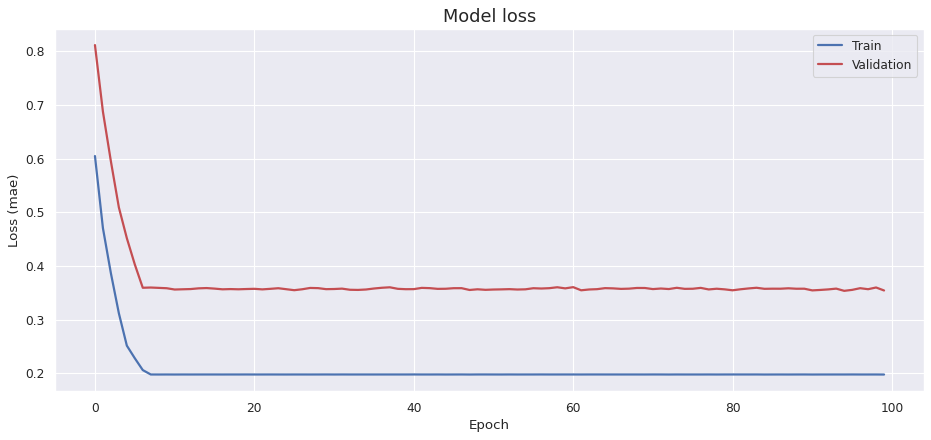

In [ ]:
fig, ax = plt.subplots(figsize=(14,6), dpi=80)
ax.plot(history['loss'], 'b', label='Train',linewidth=2)
ax.plot(history['val_loss'],'r',label='Validation',linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

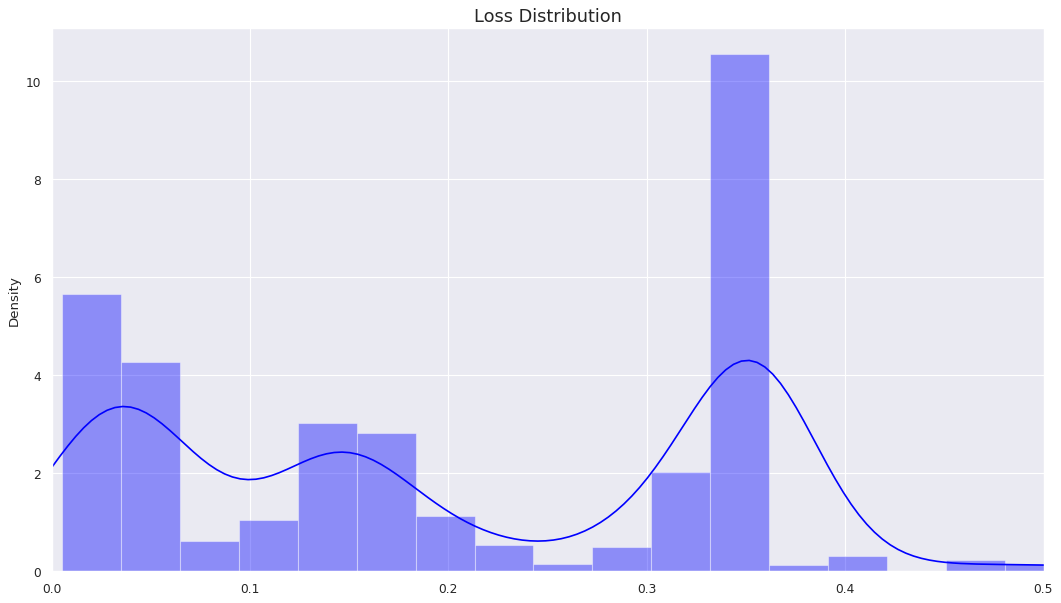

In [ ]:

X_pred = model.predict(X_train[0:-100])
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
#X_pred = pd.DataFrame(X_pred, columns=train1.columns)
#X_pred.index = train1[0:-100].index

#scored = pd.DataFrame(index=train1.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
loss_mae= np.mean(np.abs(X_pred-Xtrain[100:]),axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(loss_mae,bins = 20, kde = True, color = 'blue')
plt.xlim([0.0,.5])




In [ ]:
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(train1.to_numpy()[:,indexes])
X_train2 = scaler.fit_transform(train2.to_numpy()[:,indexes])
X_train3 = scaler.fit_transform(train3.to_numpy()[:,indexes])
X_train4 = scaler.fit_transform(train4.to_numpy()[:,indexes])
X_train5 = scaler.fit_transform(train5.to_numpy()[:,indexes])

X_test1 = scaler.fit_transform(test1.to_numpy()[:,indexes])
X_test2 = scaler.fit_transform(test2.to_numpy()[:,indexes])
X_test3 = scaler.fit_transform(test3.to_numpy()[:,indexes])
X_test4 = scaler.fit_transform(test4.to_numpy()[:,indexes])
X_test5 = scaler.fit_transform(test5.to_numpy()[:,indexes])

X_train1 = X_train1.reshape(X_train1.shape[0], 1, X_train1.shape[1])
print('Training 1 data shape: ', X_train1.shape)

X_train2 = X_train2.reshape(X_train2.shape[0], 1, X_train2.shape[1])
print('Training 2 data shape: ', X_train2.shape)

X_train3 = X_train3.reshape(X_train3.shape[0], 1, X_train3.shape[1])
print('Training 3 data shape: ', X_train3.shape)

X_train4 = X_train4.reshape(X_train4.shape[0], 1, X_train4.shape[1])
print('Training 4 data shape: ', X_train4.shape)

X_train5 = X_train5.reshape(X_train5.shape[0], 1, X_train5.shape[1])
print('Training 5 data shape: ', X_train5.shape)

X_test1 = X_test1.reshape(X_test1.shape[0], 1, X_test1.shape[1])
print('Training 1 data shape: ', X_test1.shape)

X_test2 = X_test2.reshape(X_test2.shape[0], 1, X_test2.shape[1])
print('Training 2 data shape: ', X_test2.shape)

X_test3 = X_test3.reshape(X_test3.shape[0], 1, X_test3.shape[1])
print('Training 3 data shape: ', X_test3.shape)

X_test4 = X_test4.reshape(X_test4.shape[0], 1, X_test4.shape[1])
print('Training 4 data shape: ', X_test4.shape)

X_test5 = X_test5.reshape(X_test5.shape[0], 1, X_test5.shape[1])
print('Training 5 data shape: ', X_test5.shape)




Training 1 data shape:  (2000, 1, 2)
Training 2 data shape:  (2000, 1, 2)
Training 3 data shape:  (2000, 1, 2)
Training 4 data shape:  (2000, 1, 2)
Training 5 data shape:  (2000, 1, 2)
Training 1 data shape:  (2424, 1, 2)
Training 2 data shape:  (4532, 1, 2)
Training 3 data shape:  (3794, 1, 2)
Training 4 data shape:  (3794, 1, 2)
Training 5 data shape:  (3794, 1, 2)


In [ ]:
model = autoencoder_model(X_train1)
model.compile(optimizer='adam', loss='mae')
scaler = MinMaxScaler()
scaler_filename = 'scaler_data'
joblib.dump(scaler, scaler_filename)


history = model.fit(X_train1[0:-100], X_train1[100:], epochs=nb_epochs, batch_size=batch_size,
                    validation_split = 0.05).history





Epoch 1/100
181/181 [==============================] - 1s 6ms/step - loss: 0.6049 - val_loss: 0.8118
Epoch 2/100
181/181 [==============================] - 1s 3ms/step - loss: 0.4704 - val_loss: 0.6876
Epoch 3/100
181/181 [==============================] - 1s 3ms/step - loss: 0.3863 - val_loss: 0.5950
Epoch 4/100
181/181 [==============================] - 1s 3ms/step - loss: 0.3116 - val_loss: 0.5090
Epoch 5/100
181/181 [==============================] - 1s 3ms/step - loss: 0.2513 - val_loss: 0.4517
Epoch 6/100
181/181 [==============================] - 1s 3ms/step - loss: 0.2278 - val_loss: 0.4027
Epoch 7/100
181/181 [==============================] - 1s 3ms/step - loss: 0.2057 - val_loss: 0.3592
Epoch 8/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1975 - val_loss: 0.3596
Epoch 9/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1975 - val_loss: 0.3590
Epoch 10/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1975 - val_lo

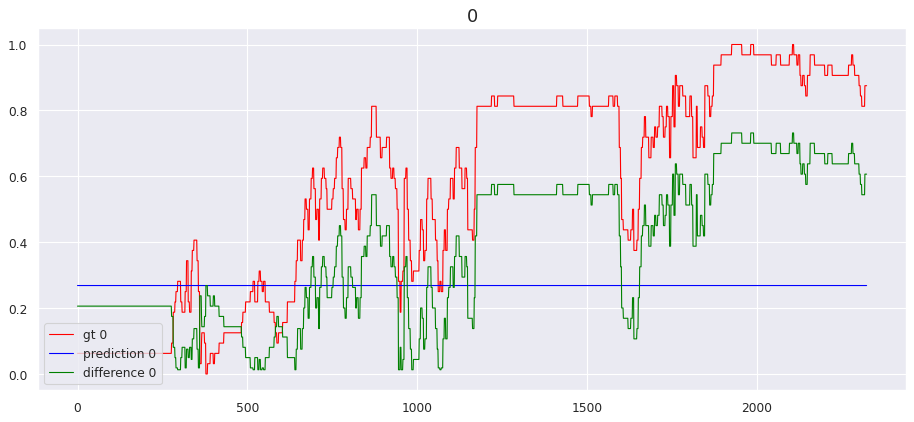

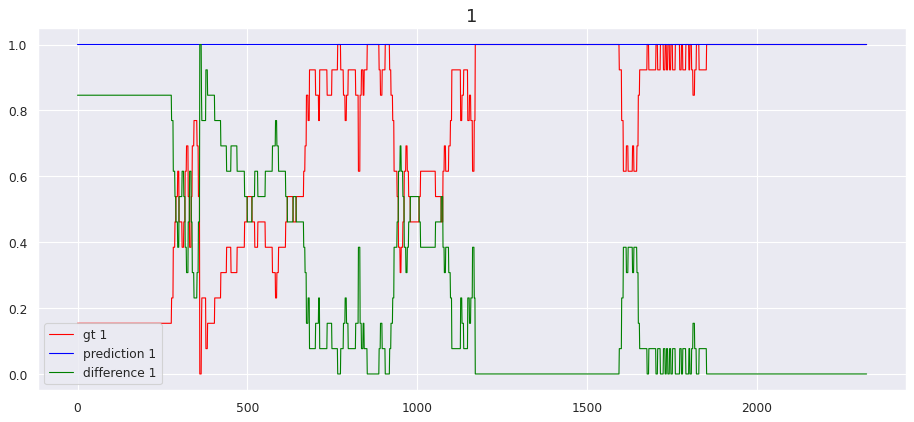

In [ ]:
X_pred = model.predict(X_test1[0:-100])
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
#X_pred = pd.DataFrame(X_pred, columns=test1.columns)
#X_pred.index = test1[0:-100].index

for i in range(len(indexes)):
  fig, ax = plt.subplots(figsize=(14,6),dpi=80)
  ax.plot(X_test1[100:,0,i],label='gt '+str(i), color = 'red', animated = True, linewidth=1)
  ax.plot(X_pred[:,i],label='prediction '+ str(i), color = 'blue', animated = True, linewidth=1)
  ax.plot(np.abs(X_test1[100:,0,i]-X_pred[:,i]),label='difference ' + str(i), color = 'green', animated = True, linewidth=1)
  plt.legend(loc='lower left')
  ax.set_title(str(i), fontsize=16)
  plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

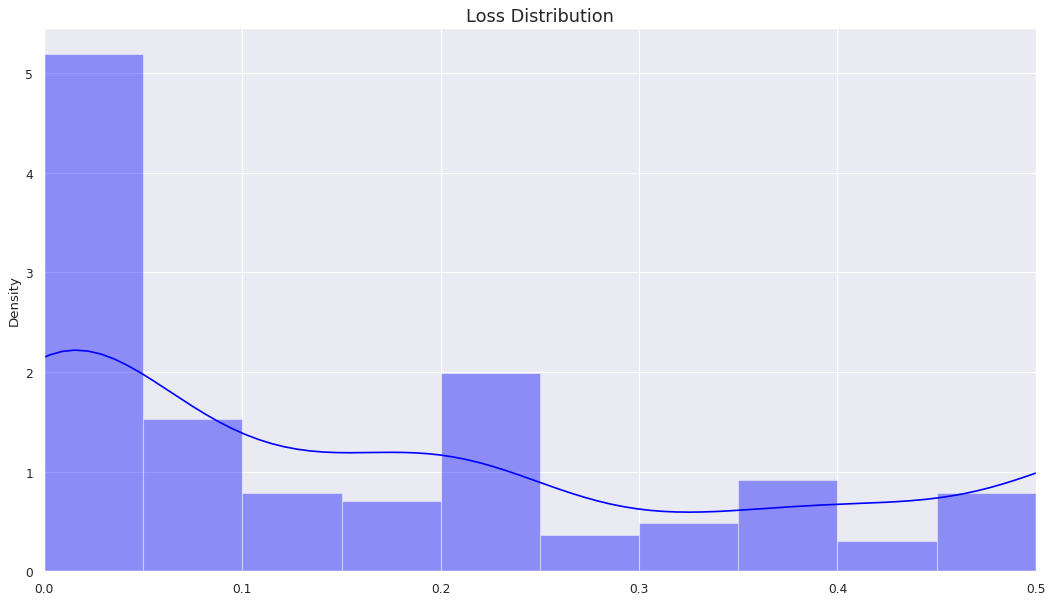

In [ ]:
X_pred = model.predict(X_test1[0:-100])
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])

loss_mae = np.mean(np.abs(X_pred-X_test1[100:]),axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(loss_mae,bins = 20, kde = True, color = 'blue')
plt.xlim([0.0,.5])


In [ ]:
model = autoencoder_model(X_train2)
model.compile(optimizer='adam', loss='mae')
scaler = MinMaxScaler()
scaler_filename = 'scaler_data'
joblib.dump(scaler, scaler_filename)


history = model.fit(X_train2[0:-100], X_train2[100:], epochs=nb_epochs, batch_size=batch_size,
                    validation_split = 0.05).history





Epoch 1/100
181/181 [==============================] - 1s 6ms/step - loss: 0.5375 - val_loss: 0.1282
Epoch 2/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1765 - val_loss: 0.2099
Epoch 3/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1415 - val_loss: 0.2152
Epoch 4/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1363 - val_loss: 0.2274
Epoch 5/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1328 - val_loss: 0.2336
Epoch 6/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1305 - val_loss: 0.2396
Epoch 7/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1290 - val_loss: 0.2388
Epoch 8/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1265 - val_loss: 0.2315
Epoch 9/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1240 - val_loss: 0.2236
Epoch 10/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1221 - val_lo

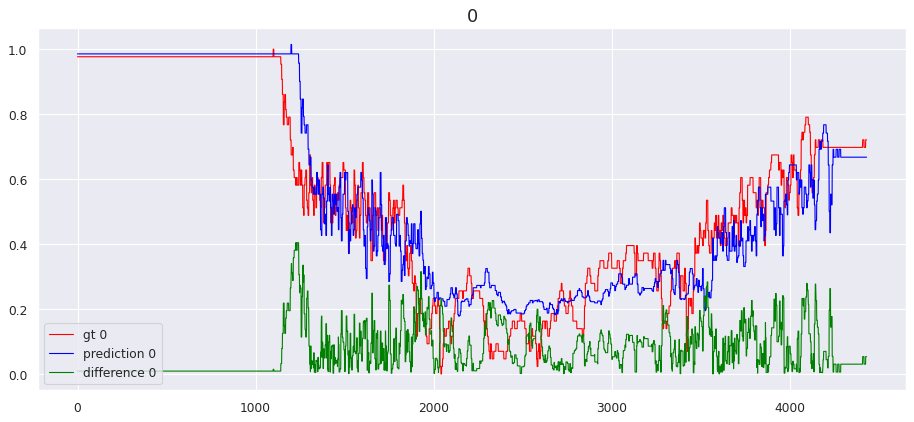

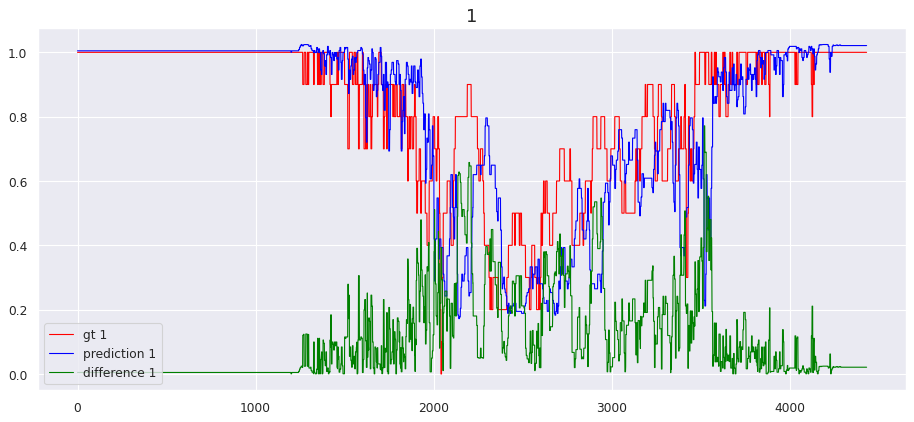

In [ ]:
X_pred = model.predict(X_test2[0:-100])
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
#X_pred = pd.DataFrame(X_pred, columns=test2.columns)
#X_pred.index = test2[0:-100].index

for i in range(len(indexes)):
  fig, ax = plt.subplots(figsize=(14,6),dpi=80)
  ax.plot(X_test2[100:,0,i],label='gt '+str(i), color = 'red', animated = True, linewidth=1)
  ax.plot(X_pred[:,i],label='prediction '+ str(i), color = 'blue', animated = True, linewidth=1)
  ax.plot(np.abs(X_test2[100:,0,i]-X_pred[:,i]),label='difference ' + str(i), color = 'green', animated = True, linewidth=1)
  plt.legend(loc='lower left')
  ax.set_title(str(i), fontsize=16)
  plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

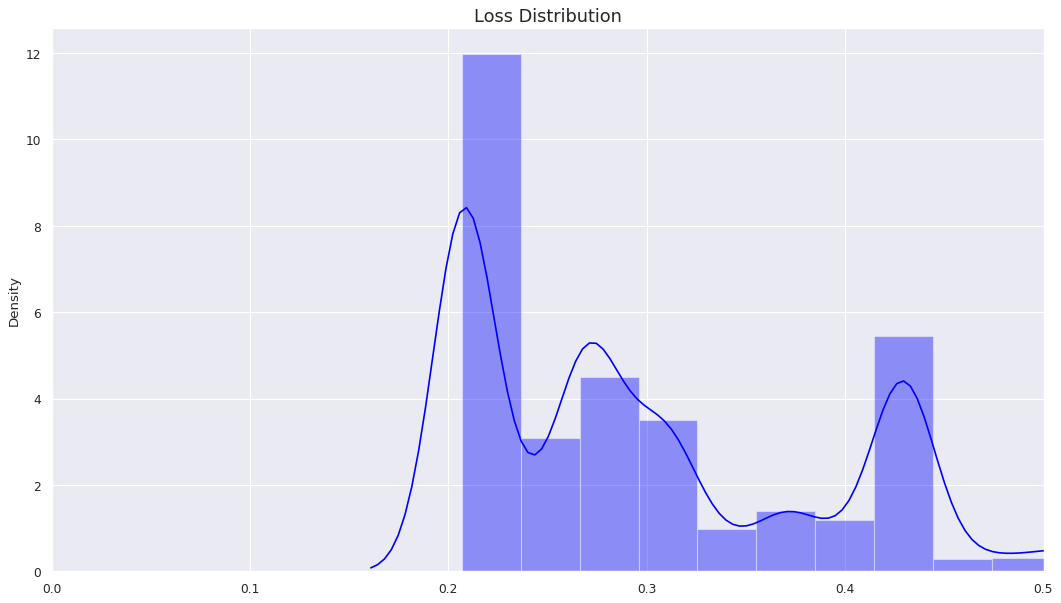

In [ ]:
X_pred = model.predict(X_test2[0:-100])
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])

loss_mae = np.mean(np.abs(X_pred-X_test2[100:]),axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(loss_mae,bins = 20, kde = True, color = 'blue')
plt.xlim([0.0,.5])


In [ ]:
model = autoencoder_model(X_train3)
model.compile(optimizer='adam', loss='mae')
scaler = MinMaxScaler()
scaler_filename = 'scaler_data'
joblib.dump(scaler, scaler_filename)


history = model.fit(X_train3[0:-100], X_train3[100:], epochs=nb_epochs, batch_size=batch_size,
                    validation_split = 0.05).history





Epoch 1/100
181/181 [==============================] - 1s 6ms/step - loss: 0.4359 - val_loss: 0.0840
Epoch 2/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1245 - val_loss: 0.1029
Epoch 3/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1231 - val_loss: 0.0932
Epoch 4/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1230 - val_loss: 0.0855
Epoch 5/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1231 - val_loss: 0.0896
Epoch 6/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1229 - val_loss: 0.0814
Epoch 7/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1232 - val_loss: 0.0802
Epoch 8/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1230 - val_loss: 0.0753
Epoch 9/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1234 - val_loss: 0.0813
Epoch 10/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1232 - val_lo

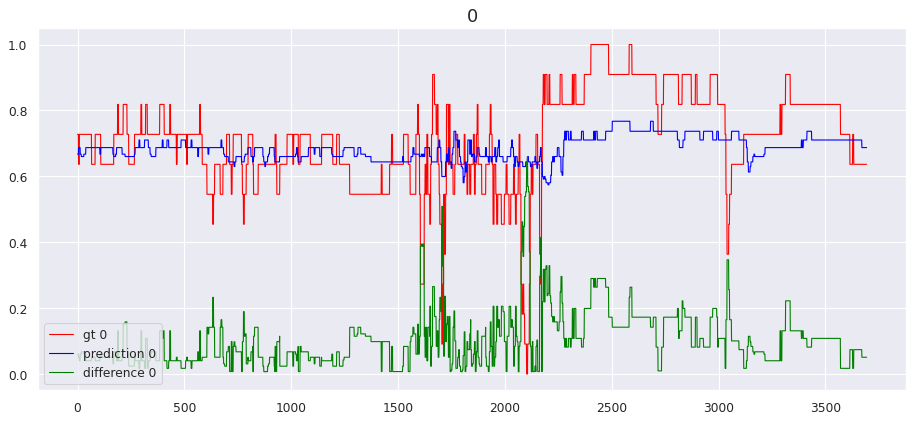

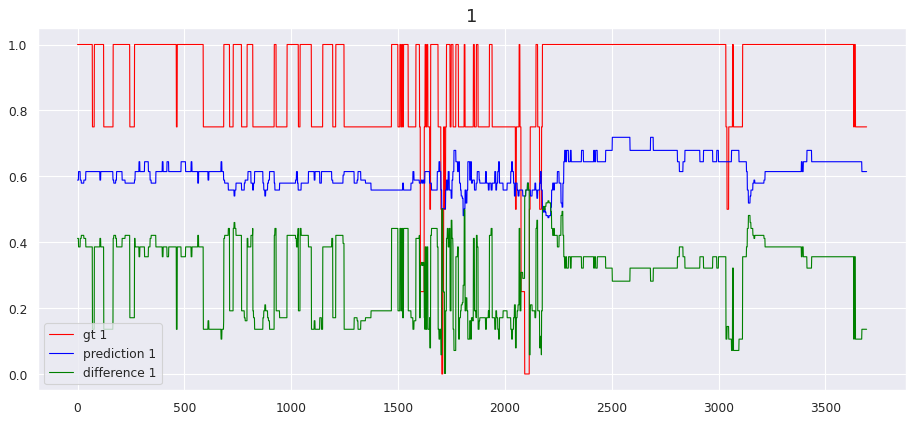

In [ ]:
X_pred = model.predict(X_test3[0:-100])
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
#X_pred = pd.DataFrame(X_pred, columns=test3.columns)
#X_pred.index = test3[0:-100].index

for i in range(len(indexes)):
  fig, ax = plt.subplots(figsize=(14,6),dpi=80)
  ax.plot(X_test3[100:,0,i],label='gt '+str(i), color = 'red', animated = True, linewidth=1)
  ax.plot(X_pred[:,i],label='prediction '+ str(i), color = 'blue', animated = True, linewidth=1)
  ax.plot(np.abs(X_test3[100:,0,i]-X_pred[:,i]),label='difference ' + str(i), color = 'green', animated = True, linewidth=1)
  plt.legend(loc='lower left')
  ax.set_title(str(i), fontsize=16)
  plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

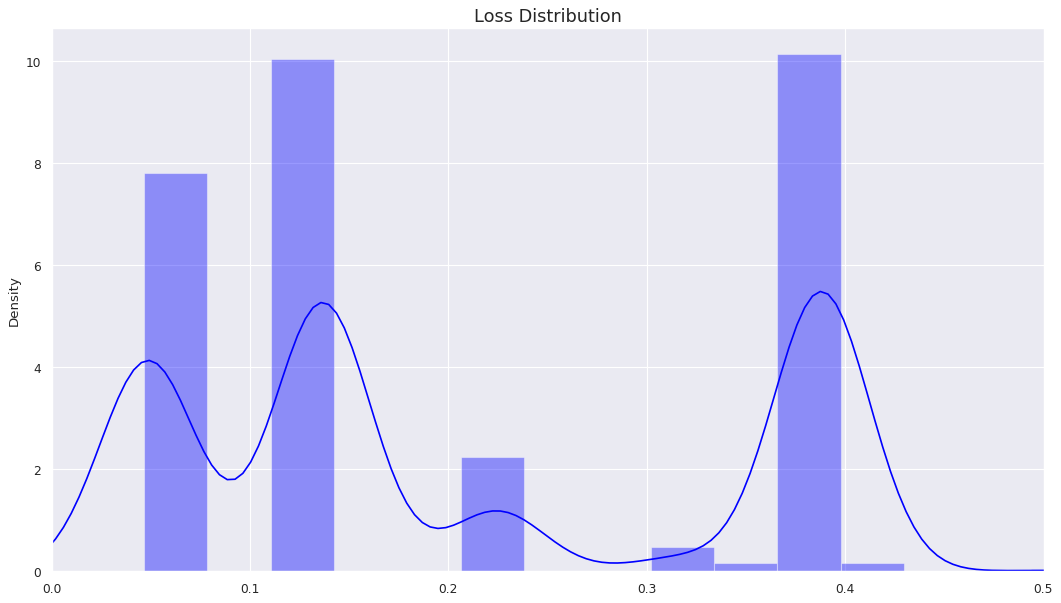

In [ ]:
X_pred = model.predict(X_test3[0:-100])
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])

loss_mae = np.mean(np.abs(X_pred-X_test3[100:]),axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(loss_mae,bins = 20, kde = True, color = 'blue')
plt.xlim([0.0,.5])


In [ ]:
model = autoencoder_model(X_train4)
model.compile(optimizer='adam', loss='mae')
scaler = MinMaxScaler()
scaler_filename = 'scaler_data'
joblib.dump(scaler, scaler_filename)

history = model.fit(X_train4[0:-100], X_train4[100:], epochs=nb_epochs, batch_size=batch_size,
                    validation_split = 0.05).history

Epoch 1/100
181/181 [==============================] - 1s 6ms/step - loss: 0.5480 - val_loss: 0.4306
Epoch 2/100
181/181 [==============================] - 1s 3ms/step - loss: 0.3701 - val_loss: 0.2543
Epoch 3/100
181/181 [==============================] - 1s 3ms/step - loss: 0.2219 - val_loss: 0.1135
Epoch 4/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1459 - val_loss: 0.0387
Epoch 5/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1265 - val_loss: 0.0350
Epoch 6/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1264 - val_loss: 0.0354
Epoch 7/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1264 - val_loss: 0.0336
Epoch 8/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1264 - val_loss: 0.0338
Epoch 9/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1265 - val_loss: 0.0342
Epoch 10/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1264 - val_lo

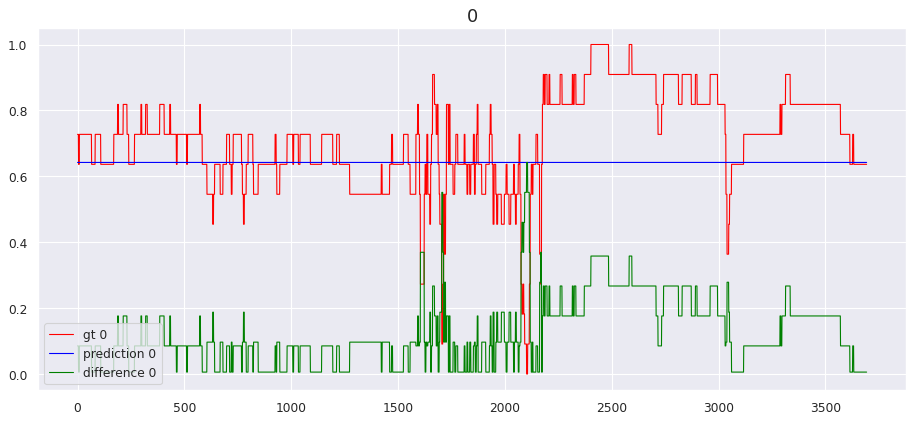

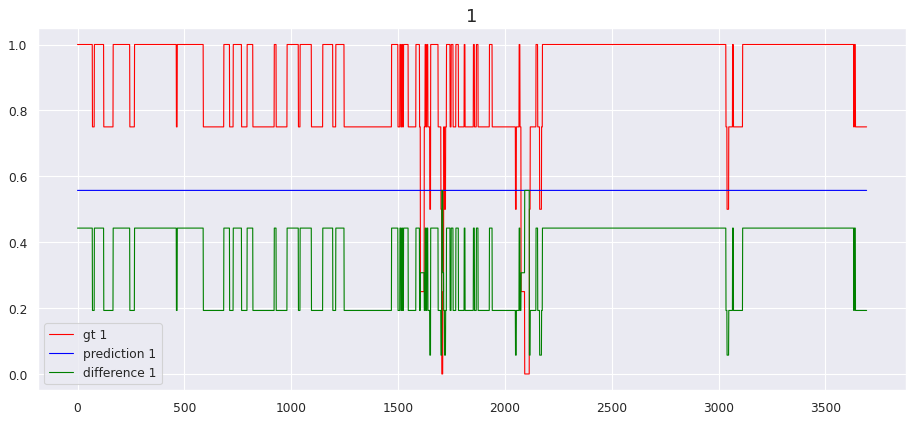

In [ ]:
X_pred = model.predict(X_test4[0:-100])
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
#X_pred = pd.DataFrame(X_pred, columns=test4.columns)
#X_pred.index = test4[0:-100].index

for i in range(len(indexes)):
  fig, ax = plt.subplots(figsize=(14,6),dpi=80)
  ax.plot(X_test4[100:,0,i],label='gt '+str(i), color = 'red', animated = True, linewidth=1)
  ax.plot(X_pred[:,i],label='prediction '+ str(i), color = 'blue', animated = True, linewidth=1)
  ax.plot(np.abs(X_test4[100:,0,i]-X_pred[:,i]),label='difference ' + str(i), color = 'green', animated = True, linewidth=1)
  plt.legend(loc='lower left')
  ax.set_title(str(i), fontsize=16)
  plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

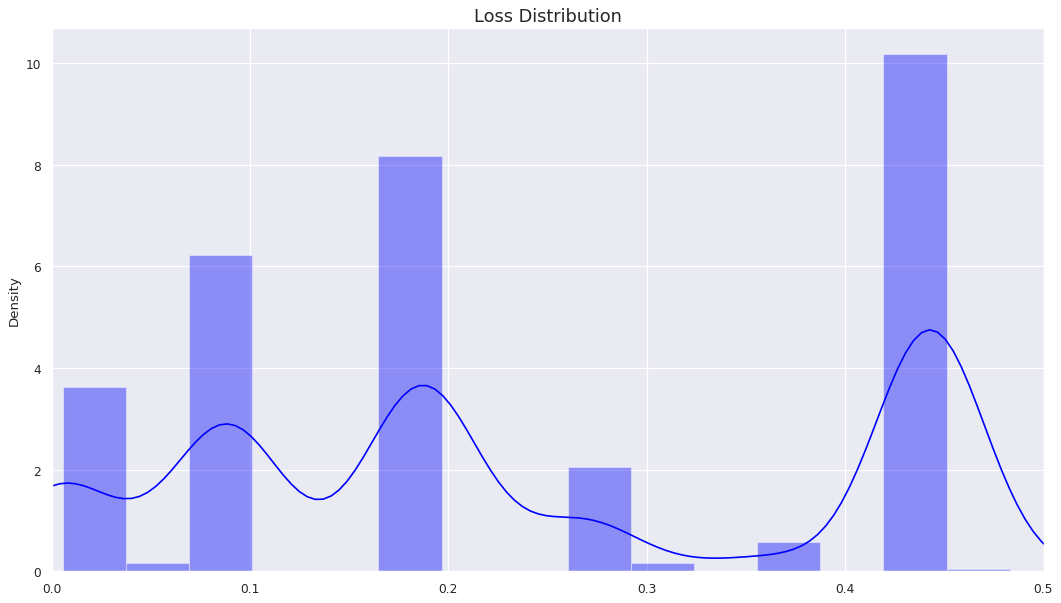

In [ ]:
X_pred = model.predict(X_test4[0:-100])
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])

loss_mae = np.mean(np.abs(X_pred-X_test4[100:]),axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(loss_mae,bins = 20, kde = True, color = 'blue')
plt.xlim([0.0,.5])


In [ ]:
model = autoencoder_model(X_train5)
model.compile(optimizer='adam', loss='mae')
scaler = MinMaxScaler()
scaler_filename = 'scaler_data'
joblib.dump(scaler, scaler_filename)


history = model.fit(X_train5[0:-100], X_train5[100:], epochs=nb_epochs, batch_size=batch_size,
                    validation_split = 0.05).history





Epoch 1/100
181/181 [==============================] - 1s 6ms/step - loss: 0.4562 - val_loss: 0.1690
Epoch 2/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1325 - val_loss: 0.1297
Epoch 3/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1256 - val_loss: 0.1129
Epoch 4/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1239 - val_loss: 0.0911
Epoch 5/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1233 - val_loss: 0.0948
Epoch 6/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1230 - val_loss: 0.0850
Epoch 7/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1232 - val_loss: 0.0831
Epoch 8/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1230 - val_loss: 0.0745
Epoch 9/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1233 - val_loss: 0.0774
Epoch 10/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1230 - val_lo

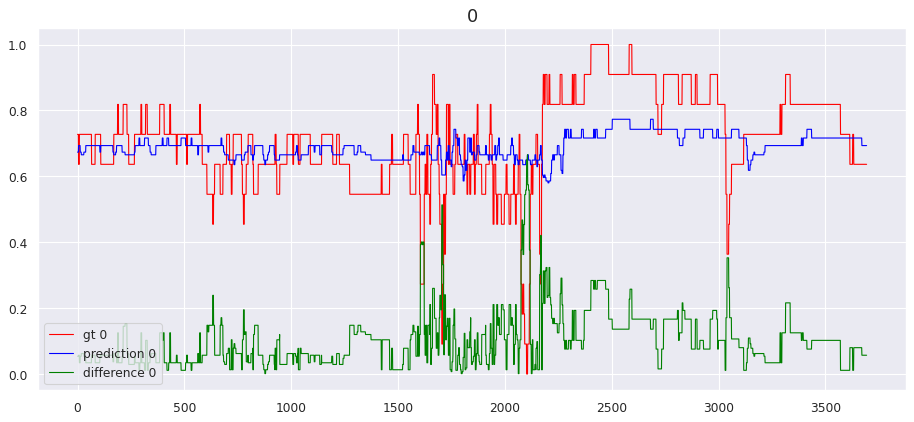

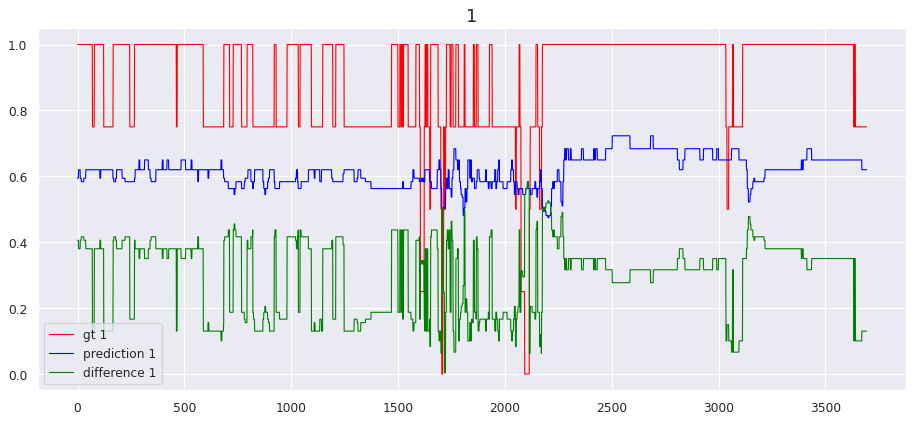

In [ ]:
X_pred = model.predict(X_test5[0:-100])
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
#X_pred = pd.DataFrame(X_pred, columns=test5.columns)
#X_pred.index = test5[0:-100].index

for i in range(len(indexes)):
  fig, ax = plt.subplots(figsize=(14,6),dpi=80)
  ax.plot(X_test5[100:,0,i],label='gt '+str(i), color = 'red', animated = True, linewidth=1)
  ax.plot(X_pred[:,i],label='prediction '+ str(i), color = 'blue', animated = True, linewidth=1)
  ax.plot(np.abs(X_test5[100:,0,i]-X_pred[:,i]),label='difference ' + str(i), color = 'green', animated = True, linewidth=1)
  plt.legend(loc='lower left')
  ax.set_title(str(i), fontsize=16)
  plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

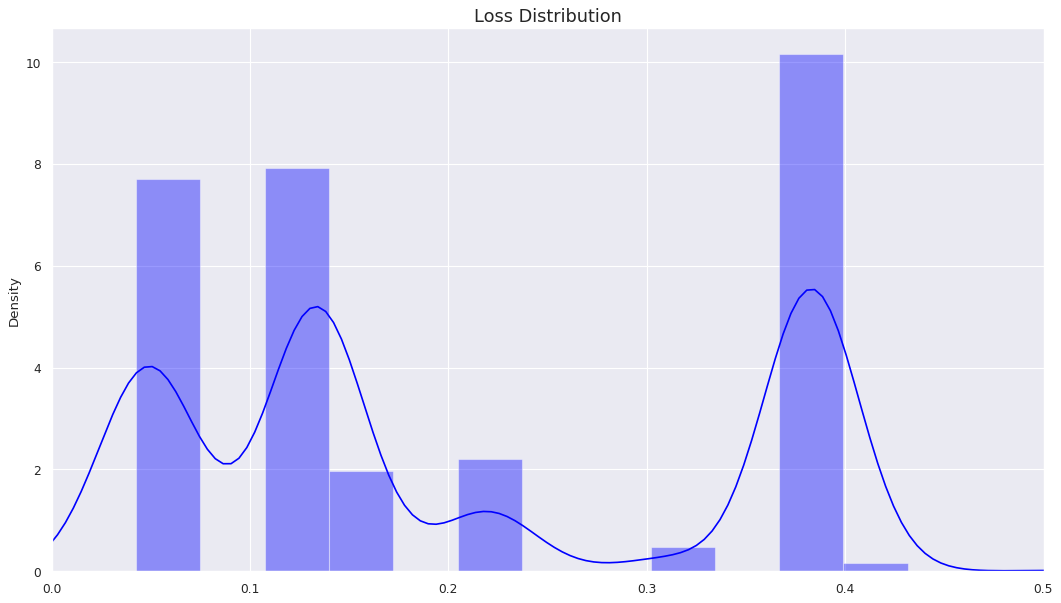

In [ ]:
X_pred = model.predict(X_test5[0:-100])
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])

loss_mae = np.mean(np.abs(X_pred-X_test5[100:]),axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(loss_mae,bins = 20, kde = True, color = 'blue')
plt.xlim([0.0,.5])
